In [274]:
%pip install numpy
%pip install pandas
%pip install matplotlib.pylab
%pip install seaborn
%pip install statsmodels
%pip install sklearn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pylab (from versions: none)
ERROR: No matching distribution found for matplotlib.pylab


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2959 sha256=75822fbdd7a39d3896ec1cc3bce1316b516aee4007f42c8b5447bd5ad3311e7b
  Stored in directory: c:\users\dave\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [277]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import datetime
import sklearn.model_selection

%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})

In [281]:
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics

In [113]:
df = pd.read_pickle('df.pickle')

In [114]:
#df['date'].dt.strftime('%W')
#df['yearcw'] = df['date'].dt.day.astype('str') + df['date'].dt.strftime('%W')
df['DayOfWeek'] = df['date'].dt.dayofweek.astype('category')
df['Month'] = df['date'].dt.month.astype('category')
df['WeekOfYear'] = df['date'].dt.weekofyear.astype('category')
df['DayOfMonth'] = df['date'].dt.day.astype('category')

C:\Users\Dave\AppData\Local\Temp\ipykernel_15624\1980806644.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['WeekOfYear'] = df['date'].dt.weekofyear.astype('category')


In [85]:
df

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,DayOfWeek,Month,WeekOfYear,DayOfMonth
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5570549,2016-03-27,11609,Easter,Cultural,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,201612,6,3,12,27
5570550,2016-03-28,11609,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,201613,0,3,13,28
5570551,2016-03-29,11609,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,201613,1,3,13,29
5570552,2016-03-30,11609,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,201613,2,3,13,30


In [115]:
df.dtypes

date            datetime64[ns]
week_id                  int64
event_name_1            object
event_type_1            object
event_name_2            object
event_type_2            object
snap                     int64
item_id                 object
dept_id                 object
cat_id                  object
sales                  float64
price                  float64
yearcw                  object
DayOfWeek             category
Month                 category
WeekOfYear            category
DayOfMonth            category
dtype: object

In [116]:
df['snap'] = df['snap'].astype(bool)
df['yearcw'] = df['yearcw'].astype('category')

In [117]:
df.set_index('date', inplace = True)

In [118]:
df.sort_index(axis = 0, ascending = True, inplace = True)

In [192]:
df_test2 = df[df['sales']>0]

In [193]:
df_test

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,DayOfWeek,Month,WeekOfYear,DayOfMonth
date,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_015,HOBBIES_1,HOBBIES,13.0,0.72,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_016,HOBBIES_1,HOBBIES,3.0,0.72,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_022,HOBBIES_1,HOBBIES,1.0,6.86,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_023,HOBBIES_1,HOBBIES,1.0,3.44,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_028,HOBBIES_1,HOBBIES,2.0,6.98,201109,1,3,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-29,11605,NaN,NaN,NaN,NaN,False,FOODS_3_819,FOODS_3,FOODS,3.0,1.98,201609,0,2,9,29
2016-02-29,11605,NaN,NaN,NaN,NaN,False,FOODS_3_822,FOODS_3,FOODS,3.0,3.98,201609,0,2,9,29
2016-02-29,11605,NaN,NaN,NaN,NaN,False,FOODS_3_823,FOODS_3,FOODS,2.0,2.88,201609,0,2,9,29


In [194]:
#df_test = df_test['sales'].groupby(by=df_test.index).agg({'sales': 'sum'})
df_test = df_test['sales'].groupby(by=df_test.index).sum()
#df_test['DayOfWeek'] = df_test.index.dayofweek.astype('category')
#df_test.index
df_test = pd.DataFrame(df_test,columns=['sales'])

In [196]:
df_test.reset_index(inplace=True)


In [197]:
df_test

,date,sales
0,2011-03-01,2549.0
1,2011-03-02,2559.0
2,2011-03-03,2568.0
3,2011-03-04,2978.0
4,2011-03-05,4096.0
...,...,...
1817,2016-02-25,3396.0
1818,2016-02-26,4087.0
1819,2016-02-27,5329.0
1820,2016-02-28,6198.0


In [199]:
df_test['DayOfWeek'] = df_test['date'].dt.dayofweek.astype('category')

In [200]:
df_test

,date,sales,DayOfWeek
0,2011-03-01,2549.0,1
1,2011-03-02,2559.0,2
2,2011-03-03,2568.0,3
3,2011-03-04,2978.0,4
4,2011-03-05,4096.0,5
...,...,...,...
1817,2016-02-25,3396.0,3
1818,2016-02-26,4087.0,4
1819,2016-02-27,5329.0,5
1820,2016-02-28,6198.0,6


<AxesSubplot:xlabel='DayOfWeek', ylabel='sales'>

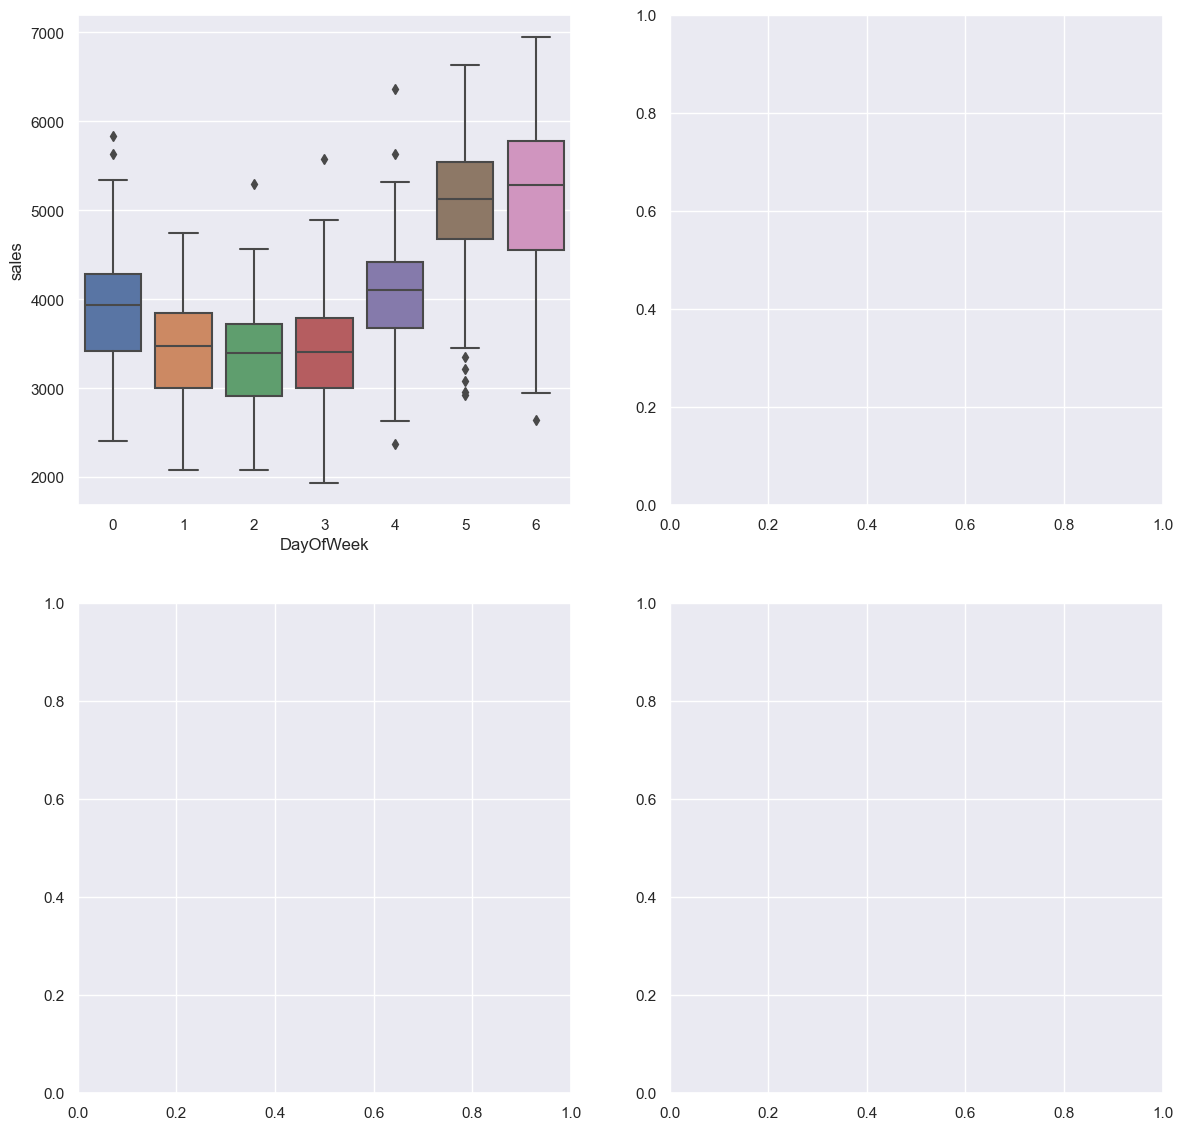

In [201]:
rows, cols = 2, 2
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(7*cols, 7*rows))
axs = axs.flatten()


sns.boxplot(x = 'DayOfWeek', y = "sales", data = df_test, ax = axs[0])
#sns.boxplot(x = 'event_type_1', y = "sales", data = df_test, ax = axs[1])
#sns.boxplot(x = 'event_type_2', y = "sales", data = df_test, ax = axs[2])

In [212]:
sns.boxplot(x = 'DayOfWeek', y = "price", data = df_test)

ValueError: Could not interpret input 'price'

<AxesSubplot:xlabel='DayOfWeek', ylabel='sales'>

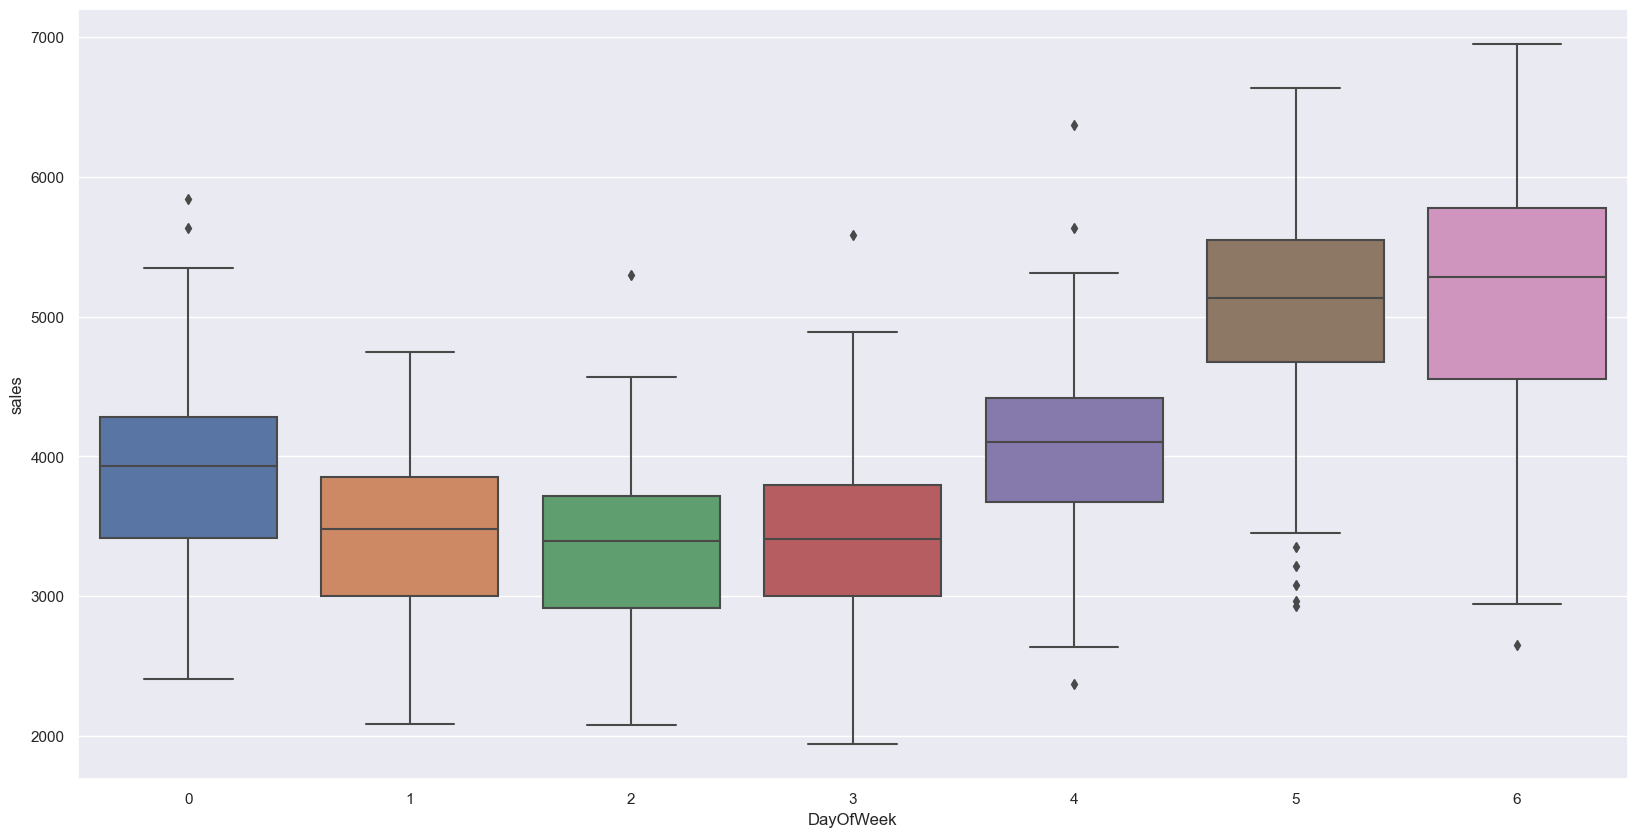

In [211]:
sns.boxplot(x = 'DayOfWeek', y = "sales", data = df_test)

In [216]:
df

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,DayOfWeek,Month,WeekOfYear,DayOfMonth
date,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-27,11609,Easter,Cultural,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,201612,6,3,12,27
2016-03-28,11609,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,201613,0,3,13,28
2016-03-29,11609,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,201613,1,3,13,29


In [239]:
df.dtypes

week_id            int64
event_name_1      object
event_type_1      object
event_name_2      object
event_type_2      object
snap                bool
item_id           object
dept_id           object
cat_id            object
sales            float64
price            float64
yearcw          category
DayOfWeek       category
Month           category
WeekOfYear      category
DayOfMonth      category
dtype: object

In [244]:
df['holiday'] = df['event_type_1'].notnull().astype('int')

In [337]:

df

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,DayOfWeek,Month,WeekOfYear,DayOfMonth,holiday
date,,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1,0
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1,0
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1,0
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1,0
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-27,11609,Easter,Cultural,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,201612,6,3,12,27,1
2016-03-28,11609,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,201613,0,3,13,28,0
2016-03-29,11609,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,201613,1,3,13,29,0


In [338]:
linreginput = df[['sales','DayOfWeek','Month','WeekOfYear','DayOfMonth','holiday']]

In [339]:
linreginput[['DayOfWeek','Month','WeekOfYear','DayOfMonth']] = df[['DayOfWeek','Month','WeekOfYear','DayOfMonth']].astype('int')

C:\Users\Dave\AppData\Local\Temp\ipykernel_15624\460134434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linreginput[['DayOfWeek','Month','WeekOfYear','DayOfMonth']] = df[['DayOfWeek','Month','WeekOfYear','DayOfMonth']].astype('int')


In [340]:
linreginput

,sales,DayOfWeek,Month,WeekOfYear,DayOfMonth,holiday
date,,,,,,
2011-03-01,0.0,1,3,9,1,0
2011-03-01,0.0,1,3,9,1,0
2011-03-01,0.0,1,3,9,1,0
2011-03-01,0.0,1,3,9,1,0
2011-03-01,0.0,1,3,9,1,0
...,...,...,...,...,...,...
2016-03-27,NaN,6,3,12,27,1
2016-03-28,NaN,0,3,13,28,0
2016-03-29,NaN,1,3,13,29,0


In [341]:
linreginput.dtypes

sales         float64
DayOfWeek       int32
Month           int32
WeekOfYear      int32
DayOfMonth      int32
holiday         int32
dtype: object

In [342]:
linreginput = linreginput.groupby(by=linreginput.index).agg({'sales':'sum','DayOfWeek':'mean','Month':'mean','WeekOfYear':'mean','DayOfMonth':'mean','holiday':'mean'})

In [343]:
linreginput.reset_index(inplace=True)

In [344]:
linreginput

,date,sales,DayOfWeek,Month,WeekOfYear,DayOfMonth,holiday
0,2011-03-01,2549.0,1.0,3.0,9.0,1.0,0.0
1,2011-03-02,2559.0,2.0,3.0,9.0,2.0,0.0
2,2011-03-03,2568.0,3.0,3.0,9.0,3.0,0.0
3,2011-03-04,2978.0,4.0,3.0,9.0,4.0,0.0
4,2011-03-05,4096.0,5.0,3.0,9.0,5.0,0.0
...,...,...,...,...,...,...,...
1853,2016-03-27,0.0,6.0,3.0,12.0,27.0,1.0
1854,2016-03-28,0.0,0.0,3.0,13.0,28.0,0.0
1855,2016-03-29,0.0,1.0,3.0,13.0,29.0,0.0
1856,2016-03-30,0.0,2.0,3.0,13.0,30.0,0.0


In [254]:
#linreginput = linreginput[linreginput['date']<'2016-03-01']

In [345]:
linreginput

,date,sales,DayOfWeek,Month,WeekOfYear,DayOfMonth,holiday
0,2011-03-01,2549.0,1.0,3.0,9.0,1.0,0.0
1,2011-03-02,2559.0,2.0,3.0,9.0,2.0,0.0
2,2011-03-03,2568.0,3.0,3.0,9.0,3.0,0.0
3,2011-03-04,2978.0,4.0,3.0,9.0,4.0,0.0
4,2011-03-05,4096.0,5.0,3.0,9.0,5.0,0.0
...,...,...,...,...,...,...,...
1853,2016-03-27,0.0,6.0,3.0,12.0,27.0,1.0
1854,2016-03-28,0.0,0.0,3.0,13.0,28.0,0.0
1855,2016-03-29,0.0,1.0,3.0,13.0,29.0,0.0
1856,2016-03-30,0.0,2.0,3.0,13.0,30.0,0.0


In [346]:
linreginput2 = pd.get_dummies(
    data = linreginput,
    columns = ['DayOfWeek','Month','WeekOfYear','DayOfMonth'],
    drop_first = False
)

In [349]:
linreginput2 = linreginput2.set_index('date')

In [350]:
linreginput2

,sales,holiday,DayOfWeek_0.0,DayOfWeek_1.0,DayOfWeek_2.0,DayOfWeek_3.0,DayOfWeek_4.0,DayOfWeek_5.0,DayOfWeek_6.0,Month_1.0,...,DayOfMonth_22.0,DayOfMonth_23.0,DayOfMonth_24.0,DayOfMonth_25.0,DayOfMonth_26.0,DayOfMonth_27.0,DayOfMonth_28.0,DayOfMonth_29.0,DayOfMonth_30.0,DayOfMonth_31.0
date,,,,,,,,,,,,,,,,,,,,,
2011-03-01,2549.0,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-02,2559.0,0.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-03,2568.0,0.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-04,2978.0,0.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-05,4096.0,0.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-27,0.0,1.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2016-03-28,0.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2016-03-29,0.0,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [365]:
linreginput_cut = linreginput2[linreginput2.index<'2016-03-01']
linreginput_last_month = linreginput2[linreginput2.index>='2016-03-01']
linreginput_last_month = linreginput_last_month.drop(columns =
[
    'sales',
    
]
)


In [353]:
linreginput_cut

,sales,holiday,DayOfWeek_0.0,DayOfWeek_1.0,DayOfWeek_2.0,DayOfWeek_3.0,DayOfWeek_4.0,DayOfWeek_5.0,DayOfWeek_6.0,Month_1.0,...,DayOfMonth_22.0,DayOfMonth_23.0,DayOfMonth_24.0,DayOfMonth_25.0,DayOfMonth_26.0,DayOfMonth_27.0,DayOfMonth_28.0,DayOfMonth_29.0,DayOfMonth_30.0,DayOfMonth_31.0
date,,,,,,,,,,,,,,,,,,,,,
2011-03-01,2549.0,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-02,2559.0,0.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-03,2568.0,0.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-04,2978.0,0.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-05,4096.0,0.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-25,3396.0,0.0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2016-02-26,4087.0,0.0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2016-02-27,5329.0,0.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [354]:
X = linreginput_cut.drop(columns =
[
    'sales',
    
]
)

In [355]:
X

,holiday,DayOfWeek_0.0,DayOfWeek_1.0,DayOfWeek_2.0,DayOfWeek_3.0,DayOfWeek_4.0,DayOfWeek_5.0,DayOfWeek_6.0,Month_1.0,Month_2.0,...,DayOfMonth_22.0,DayOfMonth_23.0,DayOfMonth_24.0,DayOfMonth_25.0,DayOfMonth_26.0,DayOfMonth_27.0,DayOfMonth_28.0,DayOfMonth_29.0,DayOfMonth_30.0,DayOfMonth_31.0
date,,,,,,,,,,,,,,,,,,,,,
2011-03-01,0.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-02,0.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-03,0.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-04,0.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-05,0.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-25,0.0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2016-02-26,0.0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2016-02-27,0.0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [356]:
y = linreginput_cut['sales']
y

date
2011-03-01    2549.0
2011-03-02    2559.0
2011-03-03    2568.0
2011-03-04    2978.0
2011-03-05    4096.0
               ...  
2016-02-25    3396.0
2016-02-26    4087.0
2016-02-27    5329.0
2016-02-28    6198.0
2016-02-29    3797.0
Name: sales, Length: 1827, dtype: float64

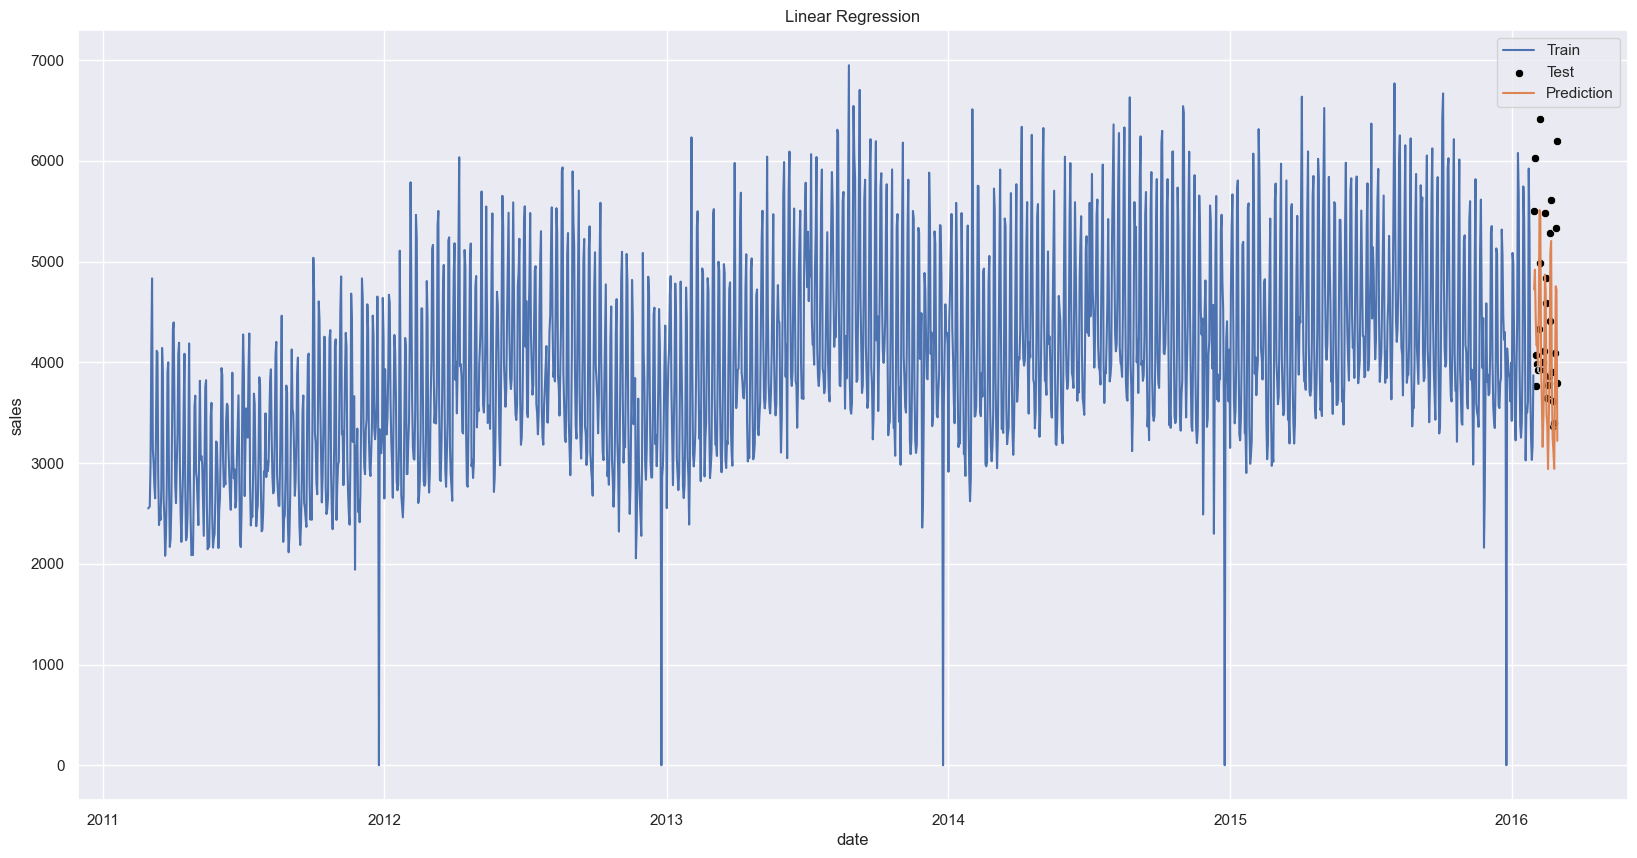

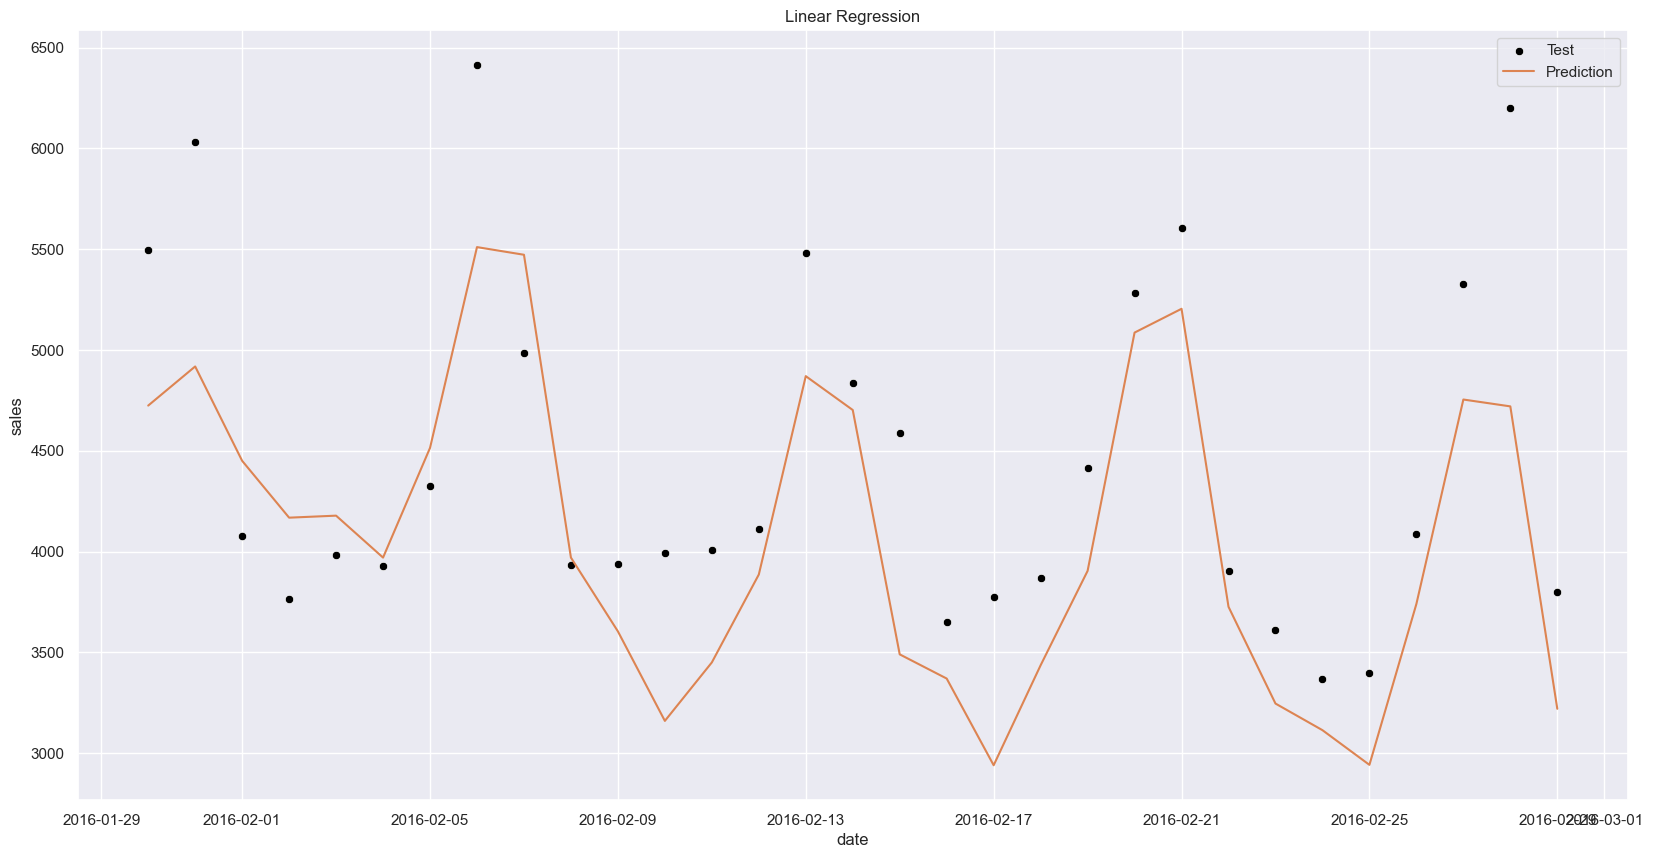

MAE:	 490.23


In [357]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=31, shuffle = False)

forecast = LinearRegression().fit(x_train, y_train)

prediction = pd.Series(data = forecast.predict(x_test), index = pd.date_range(start = x_test.index.min(), end = x_test.index.max()))
prediction.index.name = 'Date'
#
#prediction[prediction < 0] = 0
#
sns.lineplot(data = y_train, label = 'Train')
sns.scatterplot(data = y_test, color = 'black', label = 'Test')
sns.lineplot(data = prediction, label = 'Prediction')
plt.title('Linear Regression')
plt.show()
#
sns.scatterplot(data = y_test, color = 'black', label = 'Test')
sns.lineplot(data = prediction, color = sns.color_palette('deep').as_hex()[1], label = 'Prediction')
plt.title('Linear Regression')
plt.show()
#
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = prediction)))

In [367]:
first_pred = pd.Series(data = forecast.predict(linreginput_last_month), index = pd.date_range(start = linreginput_last_month.index.min(), end = linreginput_last_month.index.max()))
first_pred.index.name = 'Date'

<AxesSubplot:xlabel='Date'>

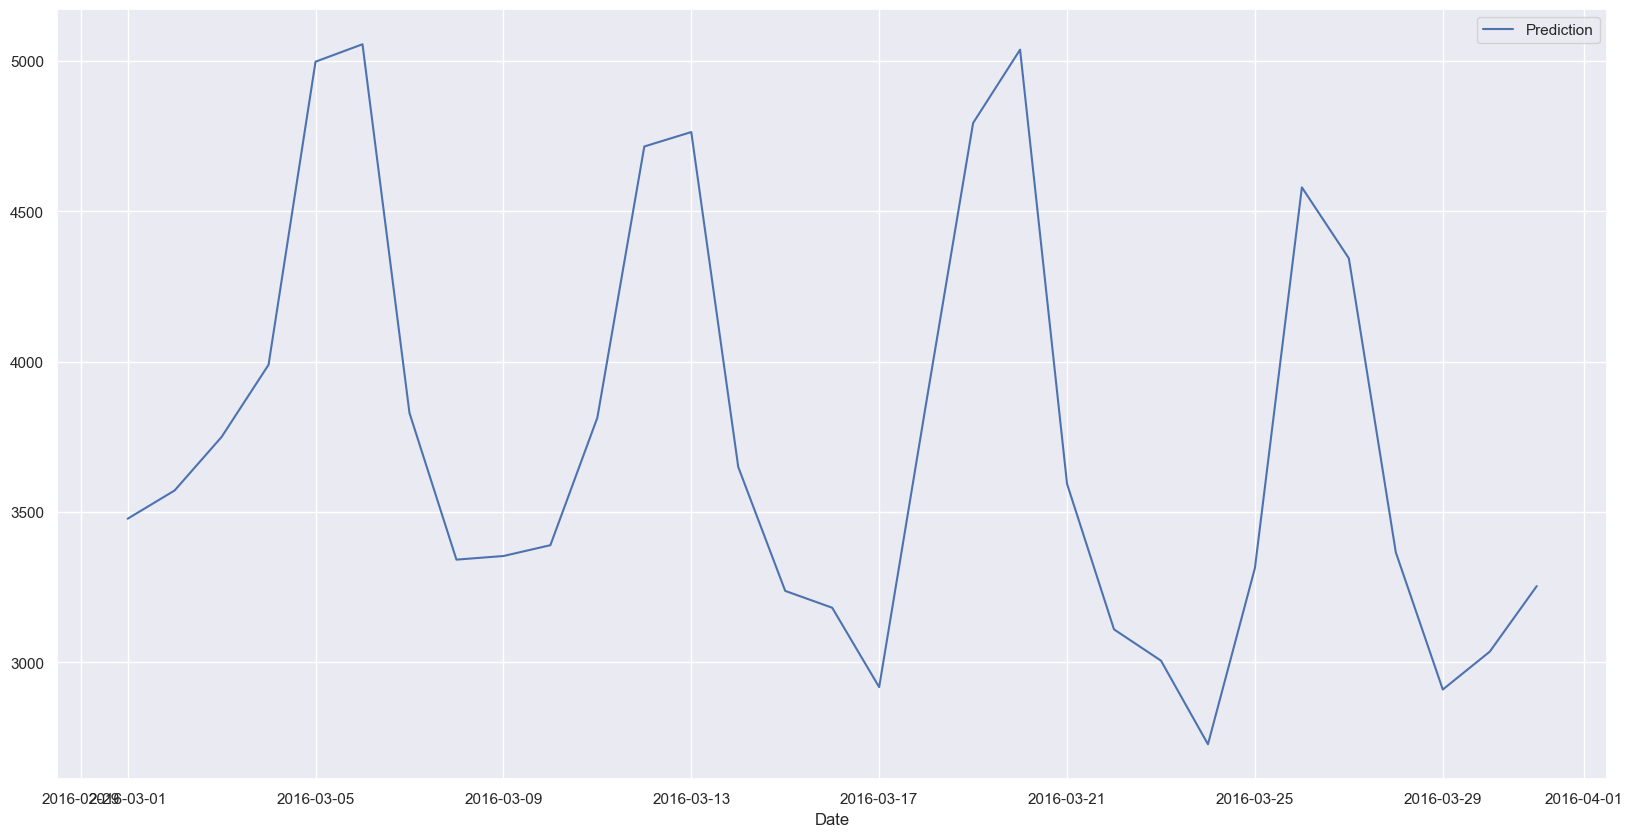

In [369]:
sns.lineplot(data = first_pred, label = 'Prediction')

In [371]:
first_pred.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 31 entries, 2016-03-01 to 2016-03-31
Freq: D
Series name: None
Non-Null Count  Dtype  
--------------  -----  
31 non-null     float64
dtypes: float64(1)
memory usage: 496.0 bytes


In [380]:
first_pred.name = 'sales'

In [381]:
first_pred

Date
2016-03-01    3478.0
2016-03-02    3572.0
2016-03-03    3750.0
2016-03-04    3990.0
2016-03-05    4998.0
2016-03-06    5056.0
2016-03-07    3830.0
2016-03-08    3342.0
2016-03-09    3354.0
2016-03-10    3390.0
2016-03-11    3814.0
2016-03-12    4716.0
2016-03-13    4764.0
2016-03-14    3650.0
2016-03-15    3238.0
2016-03-16    3182.0
2016-03-17    2918.0
2016-03-18    3862.0
2016-03-19    4794.0
2016-03-20    5038.0
2016-03-21    3594.0
2016-03-22    3110.0
2016-03-23    3006.0
2016-03-24    2728.0
2016-03-25    3314.0
2016-03-26    4580.0
2016-03-27    4344.0
2016-03-28    3366.0
2016-03-29    2910.0
2016-03-30    3036.0
2016-03-31    3254.0
Freq: D, Name: sales, dtype: float64

In [382]:
first_pred.to_csv('first_linreg.csv')